# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
sns.set()

## Load the data

In [3]:
df = pd.read_csv('2.01. Admittance.csv')

In [8]:
data = df.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.sample(5)

,SAT,Admitted
98,1764,1
8,1893,1
67,1521,0
136,1974,1
28,1849,1


## Variables

In [9]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

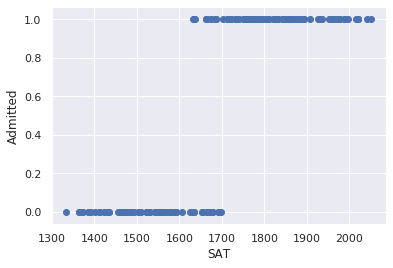

In [10]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

### Plot with a regression line

/home/igobarros/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


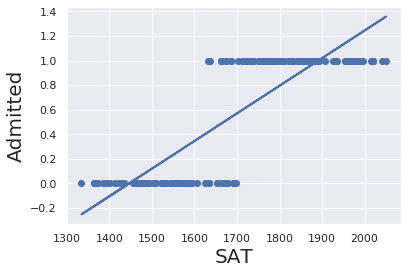

In [11]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color='C0')
y_hat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x1, y_hat, lw=2, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


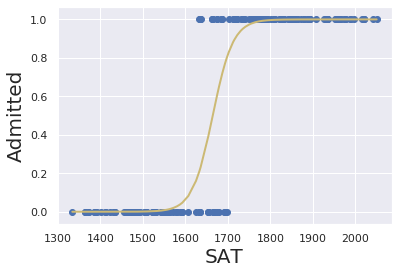

In [15]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1) / (1 + np.exp(b0 + x * b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
y_hat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x_sorted, f_sorted, lw=2, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()